In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_import numpy as np
import pandas as pdcsv('UCI_Real_Estate_Valuation.csv')

In [3]:
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df.drop(['No'], axis = 1)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [6]:
X = df.iloc[:,0:-1].values
Y = df['Y house price of unit area'].values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


## Feature Scaling 

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [9]:
data1 = ss.fit_transform(df)

In [10]:
data = pd.DataFrame(data1)

In [11]:
X = data.iloc[:,0:-1].values
Y = data[7].values

In [12]:
data.head()

,0,1,2,3,4,5,6,7
0,-1.727872,-0.824722,1.255628,-0.792495,2.007407,1.125430,0.448762,-0.005901
1,-1.719505,-0.824722,0.157086,-0.616612,1.667503,0.912444,0.401139,0.310507
2,-1.711137,1.542244,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.685782
3,-1.702770,1.246373,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237656
4,-1.694402,-1.120593,-1.117223,-0.549997,0.307885,0.834188,0.592937,0.376732


## Splliting the data into training and testing data

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3)

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [15]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [16]:
y_pred = lr.predict(xtest)

## Evaluating the result by using mean squared error

In [17]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest,y_pred)

In [18]:
print(mse)

0.4331876972594449


## Plotting 


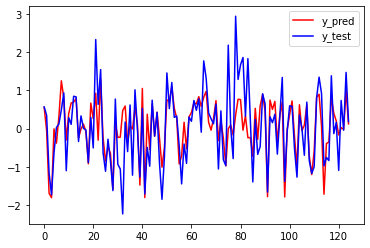

In [19]:
import matplotlib.pyplot as plt

# Assume y_pred and y_test are numpy arrays of the same length
# Make sure to import numpy if you haven't already done so

# Plot y_pred in red
plt.plot(y_pred, color='red', label='y_pred')

# Plot y_test in blue
plt.plot(ytest, color='blue', label='y_test')

# Add a legend to the graph
plt.legend()

# Show the graph
plt.show()





## Using Decision Tree Regressor

In [20]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=7)
dt.fit(xtrain,ytrain)
y_pred = dt.predict(xtest)

In [21]:
mse = mean_squared_error(ytest,y_pred)

In [22]:
print(mse)

0.4055582648357256


## Hyperparameter tuning

In [23]:
dt2 = DecisionTreeRegressor(max_depth=5)
dt2.fit(xtrain,ytrain)
y_pred = dt2.predict(xtest)
mse = mean_squared_error(ytest,y_pred)
print(mse)

0.34330474899908975


 ## LASSO REGRESSION

In [24]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha= 0.01)

In [25]:
lasso.fit(xtrain,ytrain)
y_pred = lasso.predict(xtest)

In [26]:
mse = mean_squared_error(ytest,y_pred)
print(mse)

0.4270228908095803
